In [1]:
# 사용 모델 리스트 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# scaler, pipeline, mse, r2 
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data_oh = pd.read_csv("result_one_hot2")

In [3]:
data_oh

,case,fa_job,fa_edu,life_15,fama_rel_15,age,hschool,univ_mjor,level,j_type,...,jung_bi_1.0,jung_bi_2.0,job_pp_0.0,job_pp_1.0,job_pp_2.0,job_pp_3.0,job_pp_4.0,job_pp_5.0,job_pp_6.0,job_pp_7.0
0,1.0,5.0,4.0,3.0,2.0,32.0,1.0,7.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0
1,4.0,2.0,6.0,3.0,4.0,19.0,1.0,0.0,1.0,2.0,...,0,1,0,0,1,0,0,0,0,0
2,4.0,7.0,3.0,3.0,3.0,19.0,3.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,3.0,7.0,4.0,3.0,3.0,31.0,2.0,9.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,1.0,3.0,5.0,3.0,2.0,25.0,1.0,3.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,1.0,6.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1873,6.0,12.0,0.0,2.0,6.0,36.0,1.0,10.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1874,6.0,8.0,3.0,3.0,3.0,36.0,3.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1875,6.0,6.0,2.0,4.0,3.0,42.0,3.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
g

In [4]:
data_oh.columns.unique()

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'hschool',
       'univ_mjor', 'level', 'j_type', 'JOBSAL', 'working_y', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 'edu_7.0',
       'edu_8.0', 'edu_9.0', 'marry_YN_1.0', 'marry_YN_2.0', 'univ_area_0.0',
       'univ_area_1.0', 'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0',
       'univ_area_5.0', 'univ_area_6.0', 'univ_area_7.0', 'univ_area_8.0',
       'univ_area_9.0', 'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0',
       'univ_area_13.0', 'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0',
       'univ_area_18.0', 'jung_bi_0.0', 'jung_bi_1.0', 'jung_bi_2.0',
       'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0',
       'job_pp_5.0', 'job_pp_6.0', 'job_pp_7.0'],
      dtype='object')

In [5]:
data_oh.drop(data_oh[data_oh["case"]==1].index, inplace=True)

In [6]:
data_oh.drop(data_oh[data_oh["case"]==2].index, inplace=True)

In [7]:
data_oh

,case,fa_job,fa_edu,life_15,fama_rel_15,age,hschool,univ_mjor,level,j_type,...,jung_bi_1.0,jung_bi_2.0,job_pp_0.0,job_pp_1.0,job_pp_2.0,job_pp_3.0,job_pp_4.0,job_pp_5.0,job_pp_6.0,job_pp_7.0
1,4.0,2.0,6.0,3.0,4.0,19.0,1.0,0.0,1.0,2.0,...,0,1,0,0,1,0,0,0,0,0
2,4.0,7.0,3.0,3.0,3.0,19.0,3.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
3,3.0,7.0,4.0,3.0,3.0,31.0,2.0,9.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
5,3.0,12.0,1.0,5.0,6.0,27.0,3.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
6,3.0,8.0,4.0,3.0,3.0,25.0,3.0,6.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,1.0,6.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1873,6.0,12.0,0.0,2.0,6.0,36.0,1.0,10.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1874,6.0,8.0,3.0,3.0,3.0,36.0,3.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1875,6.0,6.0,2.0,4.0,3.0,42.0,3.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,0,0,0


In [15]:
X = data_oh.drop(['case','JOBSAL', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'j_type', 'level',
                  'hschool', 'univ_mjor', 'edu_1.0', 'edu_2.0', 'edu_3.0', 'edu_4.0', 'edu_5.0', 'edu_6.0', 
                  'edu_9.0','edu_8.0',
                  'univ_area_2.0', 'univ_area_3.0', 'univ_area_4.0', 'univ_area_5.0', 'univ_area_6.0', 
                  'univ_area_7.0', 'univ_area_8.0', 'univ_area_9.0', 'univ_area_18.0','univ_area_1.0',
                  'univ_area_10.0', 'univ_area_11.0', 'univ_area_12.0', 'univ_area_13.0', 
                  'marry_YN_1.0', 
                  'univ_area_14.0', 'univ_area_15.0', 'univ_area_16.0', 'jung_bi_2.0', 'jung_bi_0.0',
                  'job_pp_0.0', 'job_pp_1.0', 'job_pp_2.0', 'job_pp_3.0', 'job_pp_4.0', 'job_pp_5.0',
                  'job_pp_6.0', 'job_pp_7.0', 'univ_area_0.0'], axis=1)
y = data_oh["JOBSAL"]

In [63]:
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [16]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [17]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              1124.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                        0.00
Time:                        20:06:16   Log-Likelihood:                         -3806.5
No. Observations:                 690   AIC:                                      7623.
Df Residuals:                     685   BIC:                                      7646.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mms, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [83]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=100, max_depth=3)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [84]:
from sklearn.metrics import accuracy_score, r2_score
import math

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.15
r-square(test) :  0.23
rmse(train) :  58.78
rmse(test) :  53.11
-------- DecisionTreeRegressor -----------
r-square(train) :  0.18
r-square(test) :  0.24
rmse(train) :  57.44
rmse(test) :  52.57
-------- RandomForestRegressor -----------
r-square(train) :  0.2
r-square(test) :  0.25
rmse(train) :  56.79
rmse(test) :  52.42
-------- GradientBoostingRegressor -----------
r-square(train) :  0.25
r-square(test) :  0.22
rmse(train) :  54.91
rmse(test) :  53.34
-------- XGBRegressor -----------
r-square(train) :  0.28
r-square(test) :  0.18
rmse(train) :  53.98
rmse(test) :  54.77


In [88]:
import numpy as np

pipe = Pipeline([('clf', DecisionTreeRegressor())]) # 일단 파이프 하나 만들어 놓은 상태

search_space = [{'clf': [DecisionTreeRegressor()],
                 'clf__max_depth': [3, 5, 10]},
                {'clf': [RandomForestRegressor()],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__max_depth': [3, 5, 10]},
               {'clf': [GradientBoostingRegressor()],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__learning_rate': [0.01, 0.05, 0.1]},
               {'clf': [XGBRegressor()],
                'clf__n_estimators': [10, 100, 1000],
                'clf__max_depth': [3, 5, 10],
                'clf__learning_rate': [0.01, 0.05, 0.1]}]

In [89]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train) 

In [90]:
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=3,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

## 제일 좋은 모델 RandomforestRegressor / max depth 3
## r2 값은 0.25정도 RMSE는 52정도

In [91]:
# 예측값과 실제값의 분포.. 얼추 비슷한것 같지만 ㅠㅠ

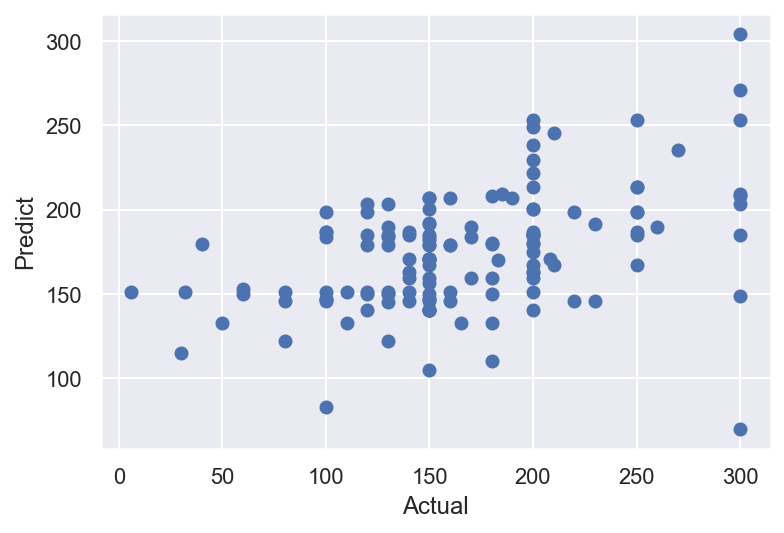

In [76]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")

plt.show()